# Chi-Squared Analysis

First Question Did more women and schildren surive compared to men?

Dataset from Canvas (Titanic Passenger List.csv )

In [5]:
import pandas as pd
passenger_df = pd.read_csv('../data/Titanic_Passengers.csv')
passenger_df.head()

,Name,Born,Died,Age,Gender,Passenger_Class,Lived_Died,Fare,Fare_decimal
0,"DEAN, Miss Elizabeth Gladys Millvina",1912.0,2009.0,0.166667,Female,3,lived,£20 11s 6d,20.58
1,"DANBOM, Master Gilbert Sigvard Emanuel",1911.0,1912.0,0.333333,Male,3,died,£14 8s,14.40
2,"TANNūS, Master As'ad",1911.0,1931.0,0.416667,Male,3,lived,£8 10s 4d,8.52
3,"PEACOCK, Master Albert Edward",1911.0,1912.0,0.583333,Male,3,died,£13 15s 6d,13.78
4,"RICHARDS, Master Sibley George",1911.0,1987.0,0.750000,Male,2,lived,£18 15s,18.75


### What kind of data is the dependent variable?

- What kind of data is the gender (independent variable)?
    - nominal

Two Types:
- Ordinal data: data that can be ordered
- Categorical/nominal: data that cannot be ordered

In [8]:
# Margins = True will show the summary
contingency_table = pd.crosstab(passenger_df['Gender'], passenger_df['Lived_Died'], margins=True)
print(type(contingency_table))
print(contingency_table)

<class 'pandas.core.frame.DataFrame'>
Lived_Died  died  lived   All
Gender                       
Female       143    339   482
Male         709    161   870
All          852    500  1352


In [7]:
# Task: Create a stacked bar chart showing the number of passengers by gender that lived or died
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Text(0, 0.5, 'Count')

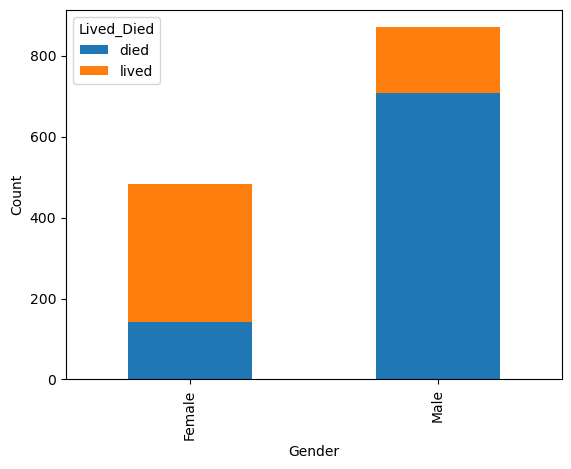

In [15]:
# First, get the number of records. get count of male and female
# we have this already from the crosstab so moving on

# Second, chart.
#plt.figure(figsize=(16,6))
#sns.barplot(x=contingency_table['died'], y=ign_df.index)

# slicing method: 
contingency_table.iloc[:-1, :-1].plot(kind='bar', stacked=True)
plt.ylabel('Count')

In [33]:
from scipy import stats # for chi2_contingency
import numpy as np

print(stats.chi2_contingency(contingency_table)[0:3])

# you get 3 values back:
# 1. Chi-Squared: the higher the chi-squared statistic, the lower likelihood that the observed values were the result of pure change.
# 2. Target P-Value
# 3. Degrees of Freedom: 1 degree of freedom (r rows -1) * (r columns - 1) = 1

(357.46388275678464, 4.288736706217388e-76, 4)


## Chi-Square Example: Was Age relevant?

In [43]:
# Check the age column. Already is fixed for the age at the time of the incident
#passenger_df.tail()

# take care of null values

#passenger_df_2 = passenger_df.loc[passenger_df['Age'] > 5]

passenger_df_nulls = passenger_df.loc[pd.isna(passenger_df['Age'])]
passenger_df_nulls

# drop null values
passenger_df


# Create the bins
passenger_df['Age_Bins'] = pd.cut(x=passenger_df['Age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

contingency_table = pd.crosstab(passenger_df['Age_Bins'], passenger_df['Lived_Died'])
contingency_table
# plot it yay
#contingency_table.plot(kind='bar')

Lived_Died,died,lived
Age_Bins,,
"(0, 10]",46,54
"(10, 20]",156,71
"(20, 30]",286,166
"(30, 40]",158,107
"(40, 50]",111,64
"(50, 60]",40,30
"(60, 70]",27,7
"(70, 80]",5,0


In [ ]:
#passenger_df.groupby(['Age_Bins', 'Lived_Died'])

# create a heatmap

# use a pivot table